<a href="https://colab.research.google.com/github/FrodoBaggins87/Machine_Learning/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###All important libraries/modules that may be needed:
1. torchvision
2. torchvision.datasets: has a range of toy datasets for different purposes
3. torchvision.models:
4. torchvision.transforms
5. torch.utils.data.Dataset
6. torch.utils.data.Dataloader

In [1]:
!pip install torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 3.6 MB/s eta 0:00:00


In [2]:
#getting libraries
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt

#import accuracy fuction
from torchmetrics.classification import MulticlassAccuracy

#chacking versions
print("PyTorch version:", torch.__version__, "Torchvision version:", torchvision.__version__)

PyTorch version: 2.1.0+cu121 Torchvision version: 0.16.0+cu121


####Getting Training and Testing Data from Torchvision.datasets

In [3]:
train_data=datasets.FashionMNIST(root="Fashion_Data",#telling where to store the data
                          train=True,#specifying if its training data or testing data
                          download=True,#to download or not in case data not already present
                          transform=ToTensor(),#which function to use to tranform PIL image into tensor
                          target_transform=None#can transform labels using this#not necessary to use here as we are just assigning None value to it(labels dont need transformation)
                          )
test_data=datasets.FashionMNIST(root="Fashion_Data",#telling where to store the data
                          train=False,#specifying if its training data or testing data
                          download=True,#to download or not in case data not already present
                          transform=ToTensor(),#which function to use to tranform PIL image into tensor
                          target_transform=None#can transform labels using this
                          )

100%|██████████| 26421880/26421880 [00:01<00:00, 15409279.60it/s]


Extracting Fashion_Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion_Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302622.96it/s]


Extracting Fashion_Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion_Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5605996.16it/s]


Extracting Fashion_Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion_Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17015190.70it/s]

Extracting Fashion_Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion_Data/FashionMNIST/raw



In [4]:
data, label= train_data[12]
data.shape, label #output tells shape of data and the label which is an integer
#first index of shape gives number of colour channels, if its 3 then image is in RGB

(torch.Size([1, 28, 28]), 5)

Checking Length of Train and Test dataset

In [5]:
train_data.__len__(),test_data.__len__() #find dataset specific methods from source code

(60000, 10000)

In [6]:
class_names=train_data.classes #returns a list of names of classes

Printing the data in dataset labels

In [7]:
labels=[]
for i in range(train_data.__len__()):
  data,label=train_data[i]
  labels.append(label)
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Visualizing Data

Image Shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Bag')

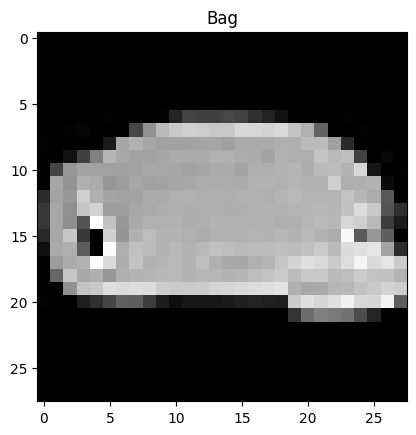

In [8]:
import matplotlib.pyplot as plt
image,label=train_data[5555]
print(f"Image Shape:{data.shape}")
image=image.view(image.shape[1],image.shape[2], image.shape[0])#putting colour map in  the last index so imshow doesnt show any error
plt.imshow(image, cmap='gray')
plt.title(class_names[label])

Making Batches


In [9]:
from torch.utils.data import DataLoader
#for large datasets its computationally faster to work in batches rather than working with individual datasets
#setting batch size hyperparameter
BATCH_SIZE= 32

train_dataloader=DataLoader(train_data,#target dataset
                            batch_size=BATCH_SIZE,#batch size
                            shuffle=True)#whether to shuffle the datapoints or not so that neural network does not get trained on some unobvious pattern present in ordering of data points
test_dataloader=DataLoader(test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)#can make it shuffle but its not necessary and will add another calculation step in every epoch
print(train_dataloader, test_dataloader)
print(len(train_dataloader), len(test_dataloader))


<torch.utils.data.dataloader.DataLoader object at 0x788fa140e530> <torch.utils.data.dataloader.DataLoader object at 0x788fa140d810>
1875 313


In [10]:
#checking data inside data loader
train_features_batch, train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

###Build a baseline model
A baseline model is the simplest model which you start with before progressing to more complicated ones.

Here, model has one difference from previous models. A nn.Flatten layer is used to convert the data in 2 dimensions (of the image ) to one feature vector.
The data in format[C,H,W] gets converted to [C,H*W].
This is done because nn.Linear layer works better with vectors

In [11]:
#to see how flatten layer works, create a flatten layer
flatten_layer=nn.Flatten()
x=train_features_batch[0]
output=flatten_layer(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [12]:
#building the baseline model
from torch import nn
class Fashion_Model_0(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layers=nn.Sequential(nn.Flatten(),
                              nn.Linear(in_features=input_shape, out_features= hidden_units),
                              nn.Linear(in_features=hidden_units, out_features= output_shape))
  def forward(self,x):
    return self.layers(x)

Making first instance of the model

In [13]:
model_0=Fashion_Model_0(input_shape=784,#as images here are 28x28=784, its hardcoded in this model
                        hidden_units=50,
                        output_shape=len(class_names))#output units will give one logit for wach member of class names
model_0.to('cpu')#keep model in cpu to begin with

Fashion_Model_0(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

Defining Accuracy, Loss function and Optimizer

In [14]:
accuracy=MulticlassAccuracy(num_classes=len(class_names))
loss_fn=nn.CrossEntropyLoss()#same as multiclass classification loss function
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)#SGD optimizer

Defining function to measure time taken for training model

In [15]:
from timeit import default_timer as timer
def print_train_time(start:float, end: float, device: torch.device=None):

  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

Making training and testing loop

In [16]:
!pip install tqdm # for showing progress meter

In [17]:
from tqdm.auto import tqdm
epochs=3#keep small at first for smaller loop time
#set random seed
torch.manual_seed(56)
#start the timer
train_start_cpu=timer()

for epoch in tqdm(range(epochs)):
  print("Epoch:", epoch)
  ##Training
  train_loss=0
  train_acc=0
  model_0.train() #put in training mode
  #loop through training batches
  for batch,(x,y) in enumerate(train_dataloader):
    #1. Forward Pass
    y_pred=model_0(x)

    #2. Calculate Loss and Accuracy
    loss= loss_fn(y_pred, y)
    train_loss+=loss#add up the loss of each sample in the batch to get loss of whole batch
    acc=accuracy(y, y_pred.argmax(dim=1))
    train_acc+=acc
    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backward
    loss.backward()

    #5. Optimizer Step
    optimizer.step()

    if batch%200==0:
      amount=(batch * len(x))/len(train_dataloader.dataset)
      print("Looked at", amount, "samples")
  train_loss/=len(train_dataloader)
  train_acc/=len(test_dataloader)#FOR SOME REASON TRAINING ACCURACY COMING AS HIGHER THAN 100%, SO ITS PROBABLY NOT A RELIABLE METRIC IN THIS CASE
  #Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x,y in test_dataloader:
      #forward pass
      test_pred= model_0(x)

      #calculate accumulative loss
      test_loss+=loss_fn(test_pred,y)

      #calculate accumulative accuracy
      test_acc+=accuracy(y, test_pred.argmax(dim=1))
    #NOTE: Calculations of test metrics should be done in inference mode
    #calculating average loss and accuracy
    test_loss/=len(test_dataloader)
    test_acc/= len(test_dataloader)
  #print out whats happening
  print("Training Loss:", train_loss.item(), "Training Accuracy:", (train_acc.item())*100,"%", "Test Loss:", test_loss.item(), "Test Accuracy:", (test_acc.item()*100),"%")

#calculate training
train_end_cpu=timer()
total_train_time_model_0=print_train_time(start=train_start_cpu,
                                           end=train_end_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0.0 samples
Looked at 0.10666666666666667 samples
Looked at 0.21333333333333335 samples
Looked at 0.32 samples
Looked at 0.4266666666666667 samples
Looked at 0.5333333333333333 samples
Looked at 0.64 samples
Looked at 0.7466666666666667 samples
Looked at 0.8533333333333334 samples
Looked at 0.96 samples
Training Loss: 0.5781870484352112 Training Accuracy: 467.3593521118164 % Test Loss: 0.5058474540710449 Test Accuracy: 80.65213561058044 %
Epoch: 1
Looked at 0.0 samples
Looked at 0.10666666666666667 samples
Looked at 0.21333333333333335 samples
Looked at 0.32 samples
Looked at 0.4266666666666667 samples
Looked at 0.5333333333333333 samples
Looked at 0.64 samples
Looked at 0.7466666666666667 samples
Looked at 0.8533333333333334 samples
Looked at 0.96 samples
Training Loss: 0.4715820848941803 Training Accuracy: 492.11182594299316 % Test Loss: 0.49587583541870117 Test Accuracy: 81.48177862167358 %
Epoch: 2
Looked at 0.0 samples
Looked at 0.10666666666666667 samples
Looke

Functionalizing training, testing and evaluation of the model

In [20]:
#following function returns the name, loss and accuracy of model provided in input
def evaluate_model(model:torch.nn.Module,
                   data_loader: torch.utils.data.DataLoader,
                   loss_fn:torch.nn.Module,
                   accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      #making preductions
      y_pred=model(x)
      #accumulating loss and accuracy
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    #calculate average loss and accuracy per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

    return {"model name": model,
            "model loss": loss.item(),
            "model accuracy": str(acc.item()*100)+"%"}

In [21]:
#testing on model_0
model_0_results=evaluate_model(model=model_0,data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy)
model_0_results

{'model name': Fashion_Model_0(
   (layers): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=50, bias=True)
     (2): Linear(in_features=50, out_features=10, bias=True)
   )
 ),
 'model loss': 0.4660087823867798,
 'model accuracy': '82.31510519981384%'}

In [ ]:
#functionalize looping through the batch to train the model, make similar function for testing the model(or if its working fine use the above model itself)